### Data understanding
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, gender, race, age, health behaviors and other features are related to their personal vaccination patterns can provide guidance for future public health efforts. We try to understand better based on data collected to guide public health efforts in predicting whether one has a likelihood of contracting H1N! virus.

More info can be found here > https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/


### Problem Statement

The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, I'll be predicting ONLY one probability - h1n1_vaccine

#### Specific objectives
    - Understand if gender has any influence on whether one is likely to contract the virus
    - Understand if Race has any influence on contracting the virus
    - Determine if Age is a factor in contacting the virus

In [343]:
#import the ecessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [344]:
#Load the datasets
df_label=pd.read_csv('training_set_labels.csv')
df_features=pd.read_csv('training_set_features.csv')


In [419]:
#check that target data has loaded correctly
df_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [420]:
#check that feature data has loaded correctly
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [348]:
#combine the dataset to clean it wholesomely
dataset=pd.concat([df_features,df_label], axis=1)

#drop repeated column and also seasonal vacine since we are interested in H1N1
dataset.drop(columns=['respondent_id', 'seasonal_vaccine'], inplace=True)
test_df.drop(columns=['respondent_id'], inplace=True)
dataset.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [349]:
df=dataset.copy()

In [350]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [351]:
df.shape

(26707, 36)

In [352]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


### Data Cleaning

In [354]:
#Lets first clean up the missing before ensuring data is in their correct formats to avoid the problem of NAs

missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
education                       5.268282
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own     

In [355]:
#For columns with the proportion of missing approximately or above 50%, I will drop them.
df.drop(columns=['employment_occupation','employment_industry','health_insurance'], axis=1, inplace=True)


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [358]:
missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
education                       5.268282
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own                     7.645936
employment_statu

In [359]:
# We inpute income_poverty with mode , since is a categorical variable and drop the rest of missing since they are below 20%

df['income_poverty']=df['income_poverty'].fillna(df['income_poverty'].mode()[0])


In [360]:
missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

h1n1_concern                   0.344479
h1n1_knowledge                 0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_h1n1               8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
education                      5.268282
marital_status                 5.272026
rent_or_own                    7.645936
employment_status              5.477965
household_adults               0.932340


In [361]:
df=df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21710 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21710 non-null  float64
 1   h1n1_knowledge               21710 non-null  float64
 2   behavioral_antiviral_meds    21710 non-null  float64
 3   behavioral_avoidance         21710 non-null  float64
 4   behavioral_face_mask         21710 non-null  float64
 5   behavioral_wash_hands        21710 non-null  float64
 6   behavioral_large_gatherings  21710 non-null  float64
 7   behavioral_outside_home      21710 non-null  float64
 8   behavioral_touch_face        21710 non-null  float64
 9   doctor_recc_h1n1             21710 non-null  float64
 10  doctor_recc_seasonal         21710 non-null  float64
 11  chronic_med_condition        21710 non-null  float64
 12  child_under_6_months         21710 non-null  float64
 13  health_worker        

In [362]:
# Confirm no more missing data

missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

Series([], dtype: float64)

In [363]:
# Check for duplicates
df.duplicated().sum()

0

In [364]:
num_df=df.select_dtypes(include='number')


In [412]:
# Ensure features are in their correct data formats
binary_cols = [col for col in num_df.columns if num_df[col].nunique() == 2] 
print(binary_cols )



['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'h1n1_vaccine']


In [414]:
df[binary_cols] = df[binary_cols].apply(lambda x: x.astype(int))


In [415]:
order_cols = [col for col in num_df.columns if num_df[col].nunique() > 2] 
print(order_cols)


['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


In [416]:
#convert them to int as well

df[order_cols] = df[order_cols].apply(lambda x: x.astype(int))


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21710 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 21710 non-null  int32 
 1   h1n1_knowledge               21710 non-null  int32 
 2   behavioral_antiviral_meds    21710 non-null  int32 
 3   behavioral_avoidance         21710 non-null  int32 
 4   behavioral_face_mask         21710 non-null  int32 
 5   behavioral_wash_hands        21710 non-null  int32 
 6   behavioral_large_gatherings  21710 non-null  int32 
 7   behavioral_outside_home      21710 non-null  int32 
 8   behavioral_touch_face        21710 non-null  int32 
 9   doctor_recc_h1n1             21710 non-null  int32 
 10  doctor_recc_seasonal         21710 non-null  int32 
 11  chronic_med_condition        21710 non-null  int32 
 12  child_under_6_months         21710 non-null  int32 
 13  health_worker                21710 n

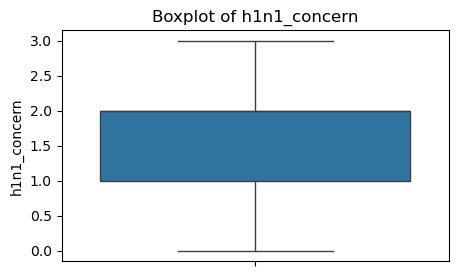

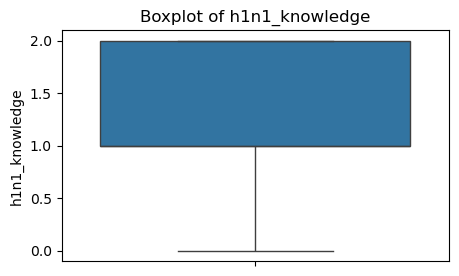

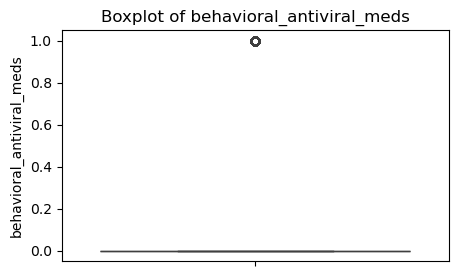

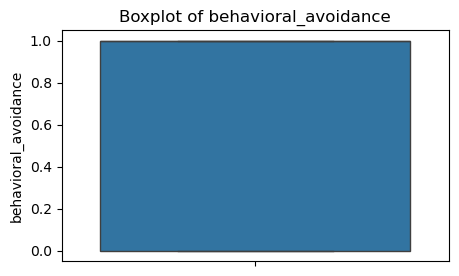

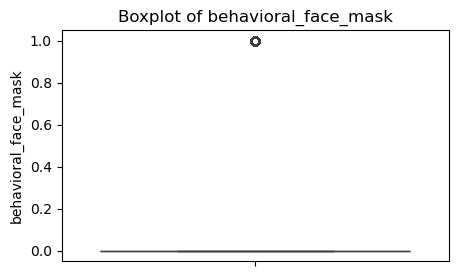

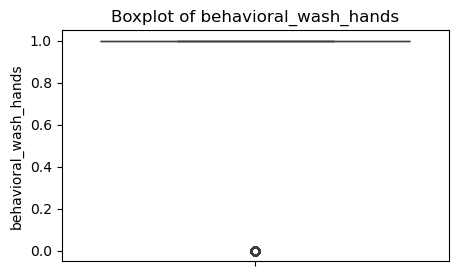

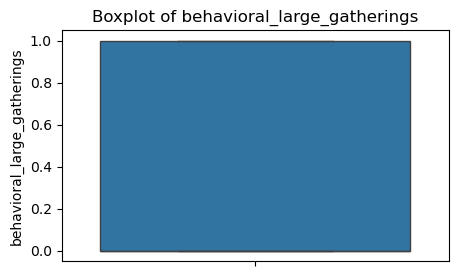

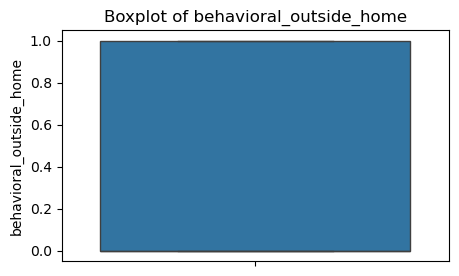

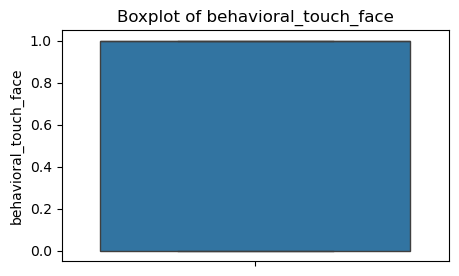

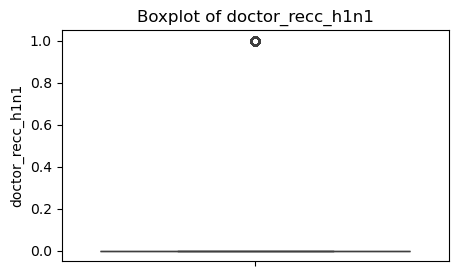

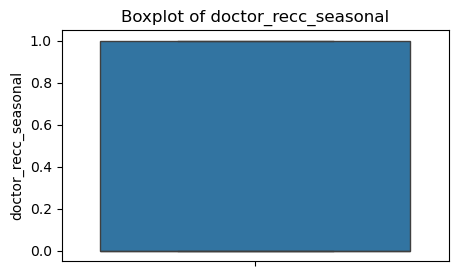

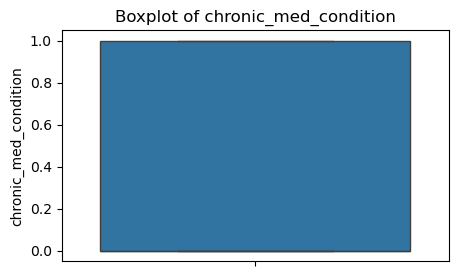

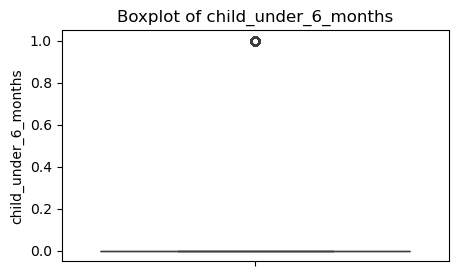

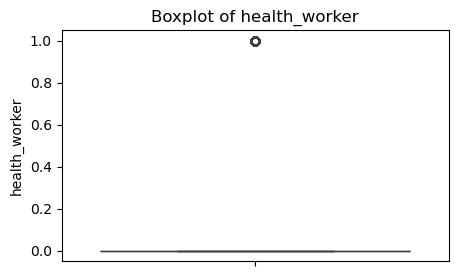

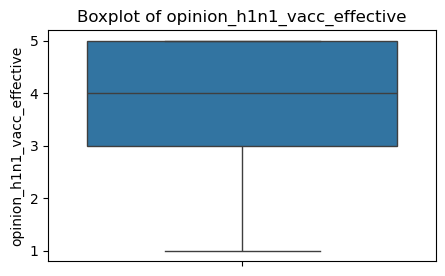

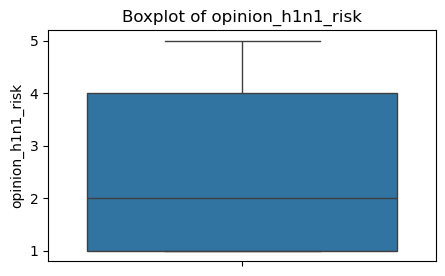

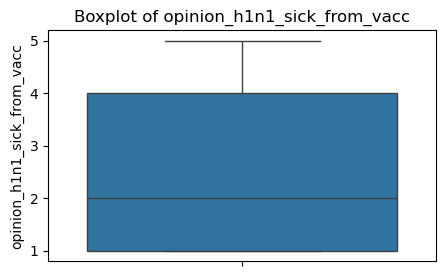

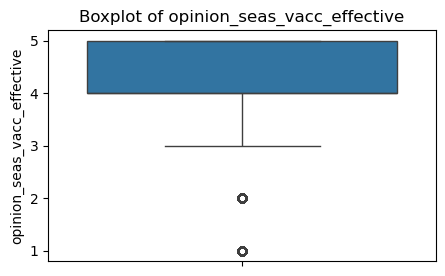

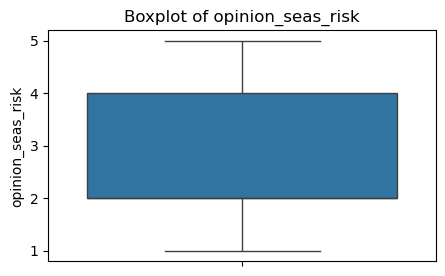

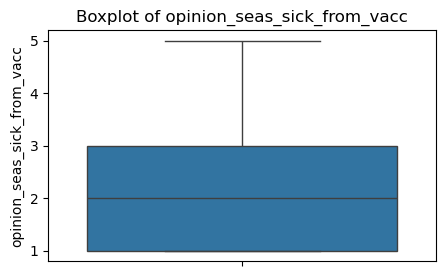

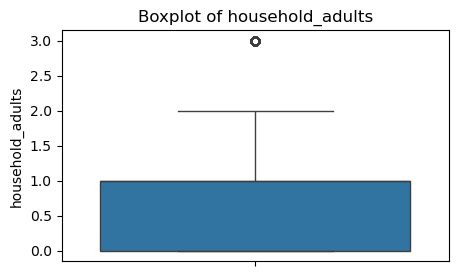

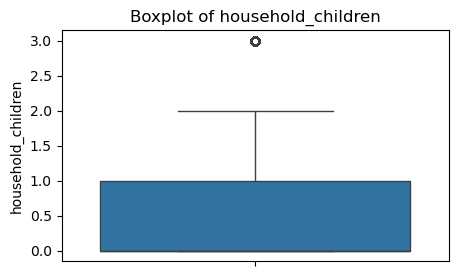

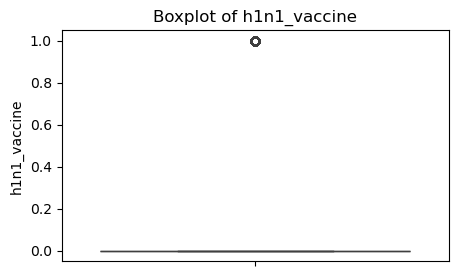

In [418]:
for i in num_df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=num_df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [424]:
# Check class imbalance
df['h1n1_vaccine'].value_counts(normalize=True)

h1n1_vaccine
0    0.773284
1    0.226716
Name: proportion, dtype: float64

In [425]:
df.shape

(21710, 33)

### EDA

In [426]:
df_clean=df.copy()

df_clean.head(4)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,1,0,0,0,0,0,0,1,1,0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,0
1,3,2,0,1,0,1,0,1,1,0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,0
3,1,1,0,1,0,1,1,0,0,0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,0
4,2,1,0,1,0,1,1,0,1,0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,0


In [428]:
#Extract numerical columns for ease of usage

num_clean_df=df_clean.select_dtypes(include='number')
num_clean_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine'],
      dtype='object')

In [429]:
#Extract categorical columns for ease of usage

cat_clean_df=df_clean.select_dtypes(exclude='number')
cat_clean_df.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [430]:
# Lets understand what is in our categorical variables. Sort values ascending to have a better picture
for i in cat_clean_df:
    print(f'The variables \033[1m{i}\033[0m has {cat_clean_df[i].nunique()} items:')
    sorted_values=sorted(cat_clean_df[i].dropna().unique())
    print(f'These are : {sorted_values }\n')

The variables age_group has 5 items:
These are : ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

The variables education has 4 items:
These are : ['12 Years', '< 12 Years', 'College Graduate', 'Some College']

The variables race has 4 items:
These are : ['Black', 'Hispanic', 'Other or Multiple', 'White']

The variables sex has 2 items:
These are : ['Female', 'Male']

The variables income_poverty has 3 items:
These are : ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty']

The variables marital_status has 2 items:
These are : ['Married', 'Not Married']

The variables rent_or_own has 2 items:
These are : ['Own', 'Rent']

The variables employment_status has 3 items:
These are : ['Employed', 'Not in Labor Force', 'Unemployed']

The variables hhs_geo_region has 10 items:
These are : ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun']

The variables census_msa has 3 items:
These ar

#### Univariate Analysis

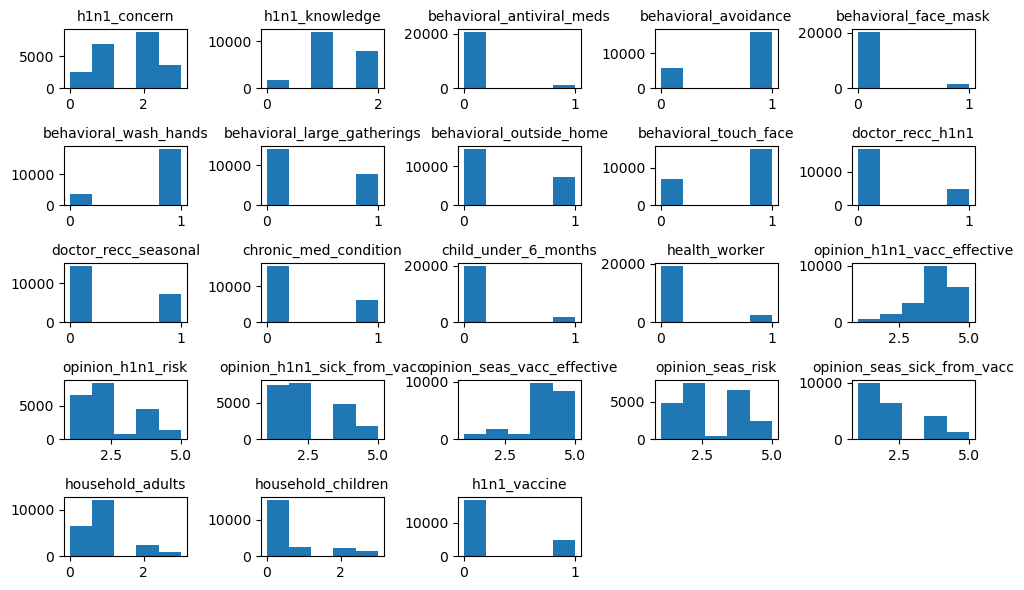

In [495]:
#Plot the distributions of numerical data
import matplotlib.pyplot as plt

num_clean_df.hist(bins=5, figsize=(10, 6), grid=False)

for ax in plt.gcf().axes:
    ax.title.set_size(10)

#Export the graph
#plt.savefig("distri.png", dpi=500, bbox_inches="tight")

# Show the plots
plt.tight_layout()
plt.show()

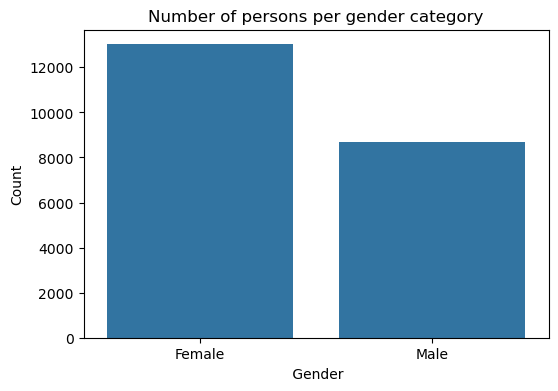

In [496]:
# check race+gender vs H1n1

gender_piv=df_clean.groupby(['sex'])['h1n1_vaccine'].count().reset_index().sort_values(by='h1n1_vaccine', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(data=gender_piv, y='h1n1_vaccine', x='sex').set(title="Number of persons per gender category", ylabel='Count', xlabel=' Gender')

#Export the graph
#plt.savefig("Gender.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

In [438]:
gender_piv

,sex,h1n1_vaccine
0,Female,13018
1,Male,8692


#### Bivariate Analysis

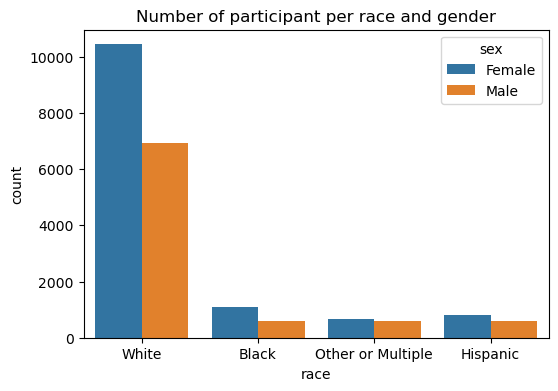

In [497]:
# Lets explore race per gender
plt.figure(figsize=(6,4))
sns.countplot(df_clean, x="race", hue="sex", legend=True)
plt.title('Number of participant per race and gender')

#Export the graph
#plt.savefig("RaceGender.png", dpi=500, bbox_inches="tight")

plt.show()

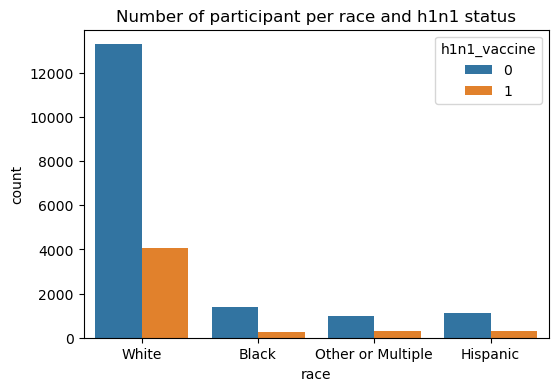

In [498]:
# similarly check race with h1n1 variable
plt.figure(figsize=(6,4))
sns.countplot(df_clean, x="race", hue="h1n1_vaccine", legend=True)
plt.title('Number of participant per race and h1n1 status')

#Export the graph
#plt.savefig("Raceh1n1.png", dpi=500, bbox_inches="tight")

plt.show()

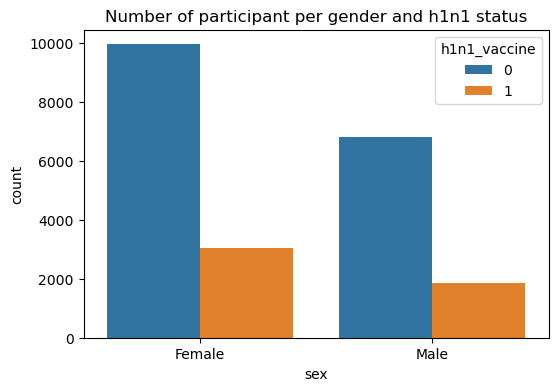

In [499]:
#Repeat the above with gender
# check race with h1n1 variable
plt.figure(figsize=(6,4))
sns.countplot(df_clean, x="sex", hue="h1n1_vaccine", legend=True)
plt.title('Number of participant per gender and h1n1 status')

#Export the graph
#plt.savefig("GenderH1n1.png", dpi=500, bbox_inches="tight")

plt.show()

In [444]:
PT=df_clean.pivot_table(index='sex', columns='h1n1_vaccine', aggfunc='size', fill_value=0)

# Convert to proportions
PT = PT.div(PT.sum(axis=1), axis=0)*100


PT

h1n1_vaccine,0,1
sex,,
Female,76.532493,23.467507
Male,78.520479,21.479521


 #### Multivariate analysis

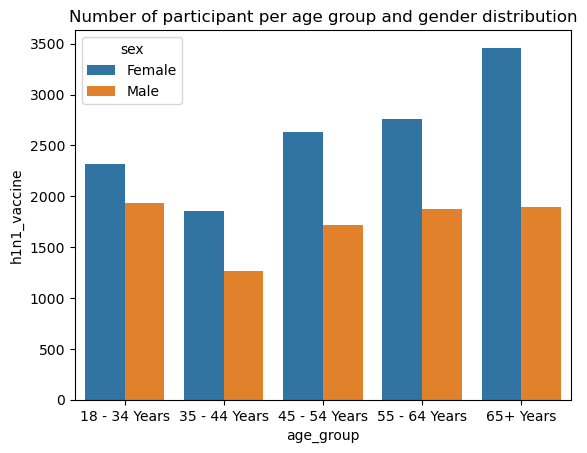

In [500]:
# Further explore the age_group with gender with respect to h1n1
AGG = df_clean.groupby(["age_group", "sex"])["h1n1_vaccine"].count().reset_index()

sns.barplot(data=AGG, x="age_group", y="h1n1_vaccine", hue="sex")
#plt.title('Number of participant per age group and gender distribution')

#Export the graph
plt.savefig("AgeGenderH1n1.png", dpi=500, bbox_inches="tight")

plt.show()

In [450]:
PT1=df_clean.pivot_table(index='age_group', columns=['sex','h1n1_vaccine'], aggfunc='size', fill_value=0)

# Convert to proportions
PT1 = PT1.div(PT1.sum(axis=1), axis=0)*100


PT1

sex               Female                  Male           
h1n1_vaccine           0          1          0          1
age_group                                                
18 - 34 Years  42.329412  12.094118  37.764706   7.811765
35 - 44 Years  44.836434  14.592688  33.707505   6.863374
45 - 54 Years  47.014240  13.527791  32.246210   7.211759
55 - 64 Years  43.961979  15.575718  29.833657  10.628645
65+ Years      50.083971  14.480313  25.825714   9.610002

### Data PreProcessing

In [451]:
df_clean.describe(include='number')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,...,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000,21710.000000
mean,1.613450,1.289728,0.048503,0.734961,0.067526,0.832381,0.356656,0.334592,0.684892,0.223169,...,0.115154,3.897743,2.343206,2.347444,4.051958,2.739613,2.107969,0.899816,0.531322,0.226716
std,0.895736,0.603993,0.214832,0.441364,0.250937,0.373536,0.479023,0.471859,0.464570,0.416380,...,0.319215,0.992184,1.285311,1.356257,1.068120,1.387962,1.327120,0.753242,0.925185,0.418717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [452]:
df_clean.describe(exclude='number')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
count,21710,21710,21710,21710,21710,21710,21710,21710,21710,21710
unique,5,4,4,2,3,2,2,3,10,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"
freq,5359,8777,17372,13018,13253,11758,16541,11850,3460,9492


#### Encoding

In [460]:
df_encoded = df_clean.copy()

In [461]:
cat_col=df_encoded.select_dtypes(exclude='number')

In [462]:
binary_cols = [col for col in cat_col if df[col].nunique() == 2]

In [463]:
binary_cols

['sex', 'marital_status', 'rent_or_own']

In [464]:
multi_cols = [col for col in cat_col if df[col].nunique() > 2]  

In [465]:
multi_cols

['age_group',
 'education',
 'race',
 'income_poverty',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [466]:
# Label Encoding for binary categorical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Copy datasets to avoid modifying originals
X_train_encoded = df_encoded.copy()


# Label Encoding for binary categorical columns (Train & Test)
le = LabelEncoder()

for col in binary_cols:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])  
     

# One-Hot Encoding for multi-category categorical columns
X_train_encoded = pd.get_dummies(X_train_encoded, columns=multi_cols, drop_first=True)



In [467]:
X_train_encoded.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,False,False,False,False,False,False,True,False,False,True
1,3,2,0,1,0,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,1,0,1,1,0,0,0,...,False,False,False,True,False,False,False,False,True,False
4,2,1,0,1,0,1,1,0,1,0,...,False,False,False,False,False,False,False,True,False,False
5,3,1,0,1,0,1,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [468]:
# Convert boolean columns to numeric (0 and 1)
for col in X_train_encoded.select_dtypes(include='bool'):
    X_train_encoded[col] = X_train_encoded[col].astype(int)
X_train_encoded.head(3)



,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,3,2,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Scaling

In [469]:
X_train_encoded.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,3,2,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [470]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train_encoded)  # Fit & transform on training


# Convert back to DataFrame for easier analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)


### Modeling

In [472]:
X_train=X_train_scaled
X_train.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Logistic Regression

In [473]:
#import necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

X=X_train.drop(columns=['h1n1_vaccine'])
y=X_train['h1n1_vaccine']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [478]:
# Initialize and train the linear regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)





              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      3397
         1.0       0.65      0.45      0.53       945

    accuracy                           0.83      4342
   macro avg       0.75      0.69      0.71      4342
weighted avg       0.81      0.83      0.82      4342



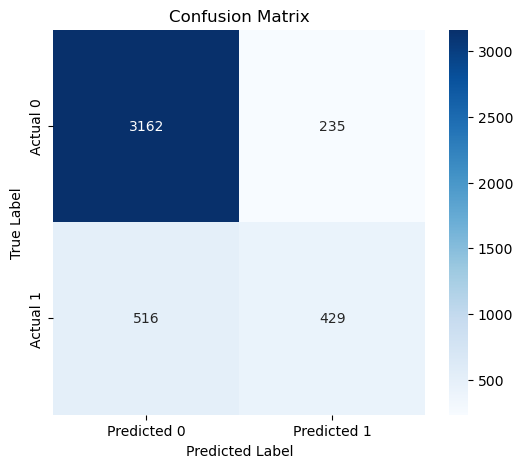

In [481]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


LR_accuracy=(f"Accuracy: {accuracy}")
LR_Recall=(f"Recall: {recall}")
LR_Precision=(f"Precision: {precision}")
LR_F1=(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [482]:
print(LR_accuracy)
print(LR_Recall)
print(LR_Precision)
print(LR_F1)

Accuracy: 0.827038231229848
Recall: 0.45396825396825397
Precision: 0.6460843373493976
F1-score: 0.5332504661280298


#### Decision Trees

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      3397
         1.0       0.42      0.49      0.45       945

    accuracy                           0.74      4342
   macro avg       0.64      0.65      0.64      4342
weighted avg       0.76      0.74      0.75      4342



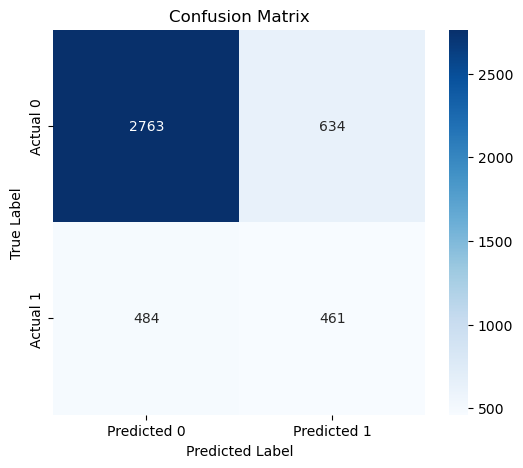

In [483]:

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

DT_accuracy=(f"Accuracy: {accuracy}")
DT_Recall=(f"Recall: {recall}")
DT_Precision=(f"Precision: {precision}")
DT_F1=(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [484]:
print(DT_accuracy)
print(DT_Recall)
print(DT_Precision)
print(DT_F1)

Accuracy: 0.7425149700598802
Recall: 0.48783068783068784
Precision: 0.42100456621004567
F1-score: 0.4519607843137255


#### Random Forest

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3397
         1.0       0.68      0.46      0.55       945

    accuracy                           0.84      4342
   macro avg       0.77      0.70      0.72      4342
weighted avg       0.82      0.84      0.82      4342



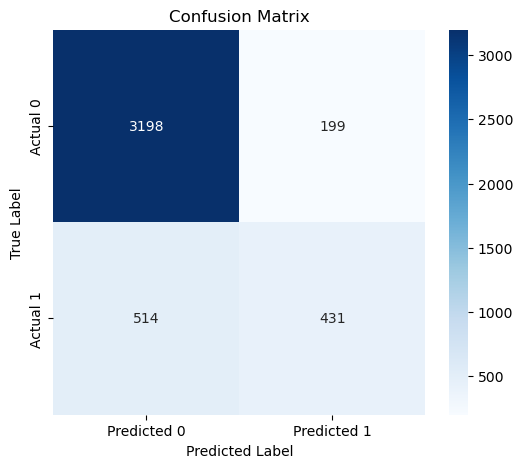

In [485]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

RF_accuracy=(f"Accuracy: {accuracy}")
RF_Recall=(f"Recall: {recall}")
RF_Precision=(f"Precision: {precision}")
RF_F1=(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [486]:
print(RF_accuracy)
print(RF_Recall)
print(RF_Precision)
print(RF_F1)

Accuracy: 0.8357899585444496
Recall: 0.4560846560846561
Precision: 0.6841269841269841
F1-score: 0.5473015873015873


#### XGBoost

In [487]:
#pip install xgboost

In [488]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [489]:
# Replace "<" and other special characters in column names
X_train.columns = X_train.columns.str.replace(r"[<>\[\]]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[<>\[\]]", "", regex=True)

In [490]:
X_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex',
       'marital_status', 'rent_or_own', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_ 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'income_poverty_ $75,000',
       'income_poverty_Below Poverty', 'employment_status_

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3397
         1.0       0.61      0.49      0.55       945

    accuracy                           0.82      4342
   macro avg       0.74      0.70      0.72      4342
weighted avg       0.81      0.82      0.81      4342



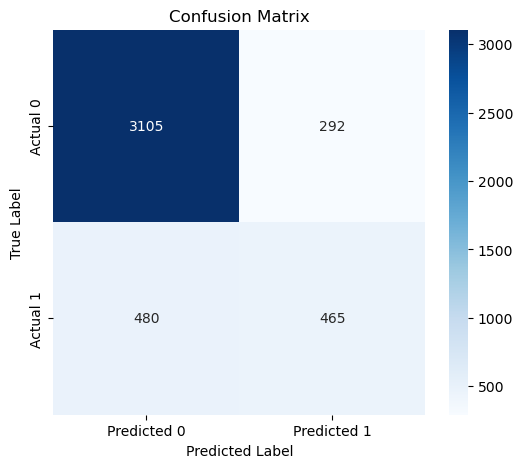

In [491]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

XGB_accuracy = f"Accuracy: {accuracy:.4f}"
XGB_Recall = f"Recall: {recall:.4f}"
XGB_Precision = f"Precision: {precision:.4f}"
XGB_F1 = f"F1-score: {f1:.4f}"

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [492]:
print(XGB_accuracy)
print(XGB_Recall)
print(XGB_Precision)
print(XGB_F1)

Accuracy: 0.8222
Recall: 0.4921
Precision: 0.6143
F1-score: 0.5464


## Model Evaluation

In [493]:
# Define metrics for each model
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree", "XGBoost"],
    "Accuracy": [RF_accuracy, LR_accuracy, DT_accuracy, XGB_accuracy],
    "Recall": [RF_Recall, LR_Recall, DT_Recall, XGB_Recall],
    "Precision": [RF_Precision, LR_Precision, DT_Precision, XGB_Precision],
    "F1-Score": [RF_F1, LR_F1, DT_F1, XGB_F1]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)



In [494]:
# Display the table
metrics_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Random Forest,Accuracy: 0.8357899585444496,Recall: 0.4560846560846561,Precision: 0.6841269841269841,F1-score: 0.5473015873015873
1,Logistic Regression,Accuracy: 0.827038231229848,Recall: 0.45396825396825397,Precision: 0.6460843373493976,F1-score: 0.5332504661280298
2,Decision Tree,Accuracy: 0.7425149700598802,Recall: 0.48783068783068784,Precision: 0.42100456621004567,F1-score: 0.4519607843137255
3,XGBoost,Accuracy: 0.8222,Recall: 0.4921,Precision: 0.6143,F1-score: 0.5464


## Conclusion 

## Recommendation